<a href="https://colab.research.google.com/github/AlexandreSaldanha/AlexandreSaldanha/blob/main/MVP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

In [68]:

url_dados = 'https://raw.githubusercontent.com/AlexandreSaldanha/AlexandreSaldanha/main/Dataset_Exportacoes'

df = pd.read_csv(url_dados,sep=';')
df.head()

,preço_basico,cambio_efetivo,Produçao_EUA,quantumexp
0,100,100,100,100
1,"99,95588884","100,4043796","102,4","96,92392706"
2,"98,83840612","101,4655202","103,6288","88,67194695"
3,"97,92677547","104,4258986","104,4578304","110,8491435"
4,"94,23614174","108,6177512","103,4132521","105,3416836"


In [72]:
dataset['cambio_efetivo'] = dataset['cambio_efetivo'].apply(lambda x: str(x).replace(",","."))
dataset['Produçao_EUA'] = dataset['Produçao_EUA'].apply(lambda x: str(x).replace(",","."))
dataset['quantumexp'] = dataset['quantumexp'].apply(lambda x: str(x).replace(",","."))
dataset['preço_basico'] = dataset['preço_basico'].apply(lambda x: str(x).replace(",","."))

In [73]:
dataset['preço_basico'].astype('float64')
dataset['cambio_efetivo'].astype('float64')
dataset['Produçao_EUA'].astype('float64')
dataset['quantumexp'].astype('float64')

0      100.000000
1       96.923927
2       88.671947
3      110.849143
4      105.341684
          ...    
140    211.162277
141    190.219193
142    209.357156
143    197.384417
144    189.740284
Name: quantumexp, Length: 145, dtype: float64

In [74]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:3] # atributos
y = array[:,3] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [75]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

In [76]:
# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [77]:
# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

LR: MSE 599.29 (190.17) - RMSE 24.48
Ridge: MSE 599.29 (190.17) - RMSE 24.48
Lasso: MSE 599.31 (189.77) - RMSE 24.48
KNN: MSE nan (nan) - RMSE nan
CART: MSE 592.19 (242.04) - RMSE 24.33
SVM: MSE 954.94 (463.61) - RMSE 30.90


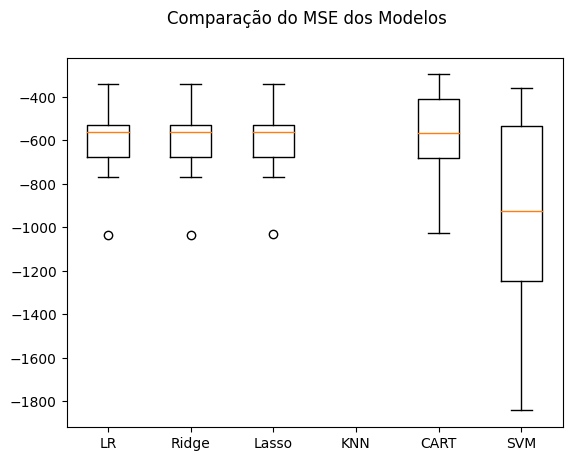

In [78]:
# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [79]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 358.88
RMSE 18.94
